

##### Traffic Signal Classification System: Solving a multiclass classification trafic signal problem for self-driven vehicles using Neural Networks and Deep Learning. Using Convolutional Neural Network as it's best for image classification purposes.



### Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import pathlib
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import  PIL
from PIL import  ImageEnhance , ImageOps , Image
from matplotlib import pyplot
from keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras

In [ ]:
plt.rcParams["figure.figsize"] = (16,10) #Make the plots bigger by default
plt.rcParams["lines.linewidth"] = 2 #Setting the default line width
plt.style.use("ggplot")

### Data Ingestion

In [ ]:
data_dir = '../input/gtsrb-german-traffic-sign'
train_path = '../input/gtsrb-german-traffic-sign/Train'
test_path = '../input/gtsrb-german-traffic-sign/'
IMG_HEIGHT = 30
IMG_WIDTH = 30

### Data Exploration

In [ ]:
### Number of Classes
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

### Visualizing all the different Signs

There are several traffic signals like speed limits, no entry,traffic signals, turn left or right, children crossing, no passing
of heavy vehicles, etc. Traffic signal classification is the process of identifying which class a traffic sign belongs to.

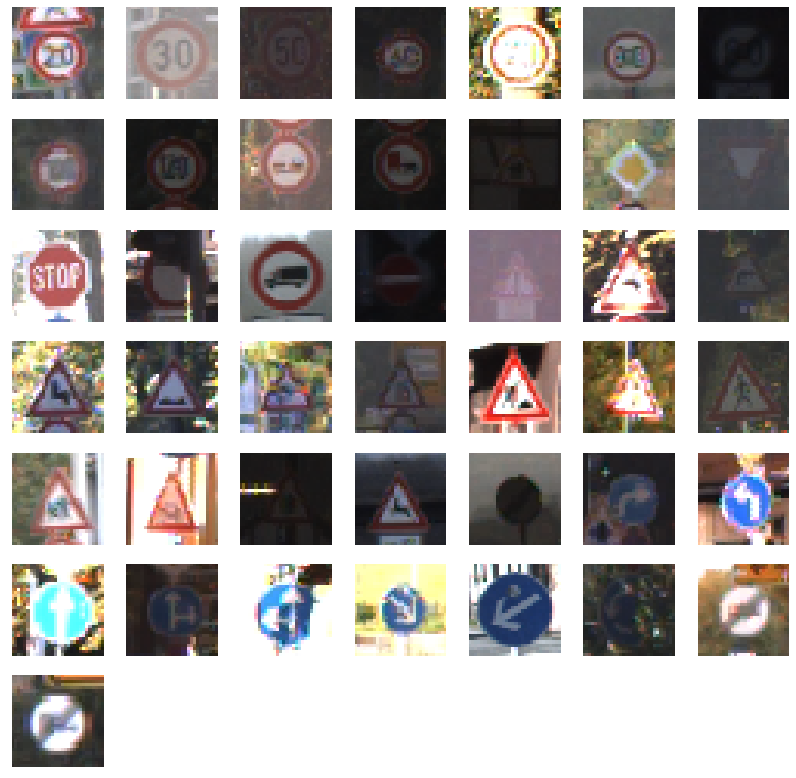

In [ ]:

img_dir = pathlib.Path(train_path)
plt.figure(figsize=(14,14))
index = 0
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
plt.show()

### Label Overview

In [ ]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

### Data Visualiization showing different categories of traffic signal with the number of sample data

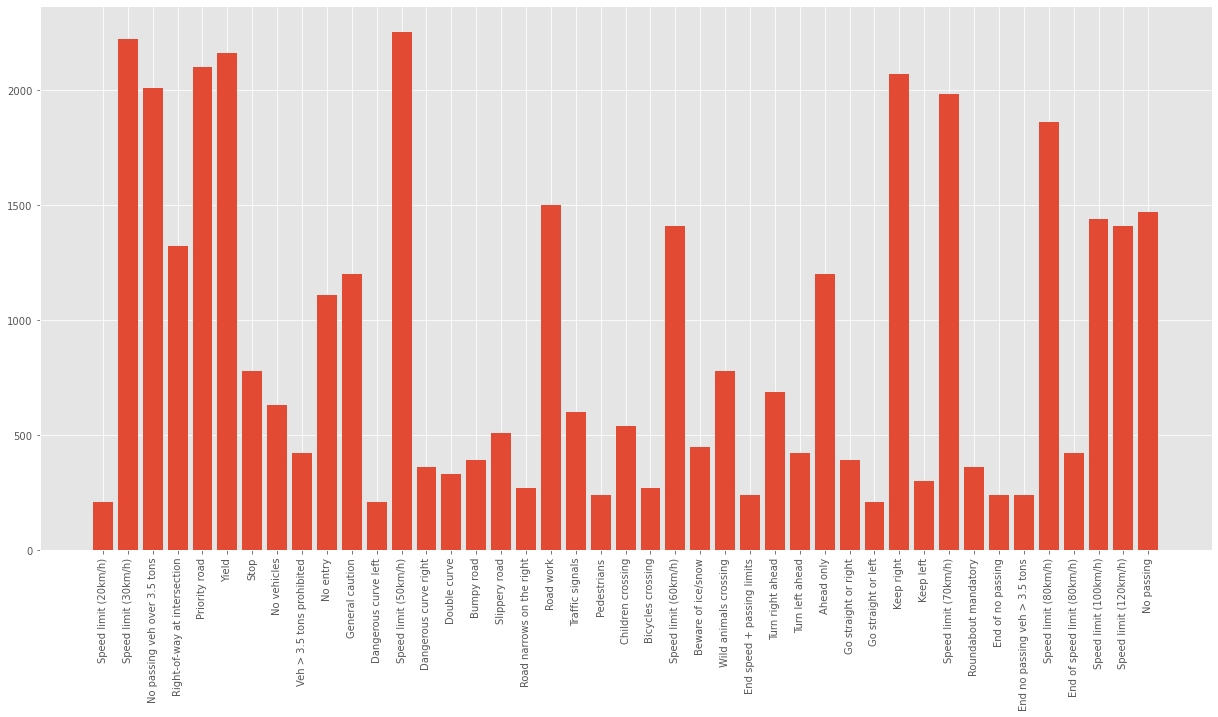

In [ ]:
folders = os.listdir(train_path)


train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])



plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

### Loading the data for training testing

In [ ]:
def load_data(data_dir):


    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    
    return images, labels

In [ ]:
images, labels = load_data(train_path)

In [ ]:
labels = to_categorical(labels)

### Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.3)

### Exploring the dataset after train test split

In [ ]:
x_train/=255
x_test/=255

print('Number of images in x_train',x_train.shape[0])
print('Number of images in x_test',x_test.shape[0])

Number of images in x_train 27446
Number of images in x_test 11763


In [ ]:
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)

x_train shape: (27446, 30, 30, 3)
x_test shape: (11763, 30, 30, 3)


The shape of train data  is (27446, 30, 30, 3) which means that there are 27446 images of size 30×30 pixels and the last 3 means the data contains colored images (RGB value).

The shape of test data  is (11763, 30, 30, 3) which means that there are 27446 images of size 30×30 pixels and the last 3 means the data contains colored images (RGB value).

### Building the Convolutional Neural Network model

The architecture of our model is:

1 Conv2D layer (filter=32, kernel_size=3, activation=”relu”)
MaxPool2D layer ( pool_size=(2,2))
Dropout layer (rate=0.25)

1 Conv2D layer (filter=64, kernel_size=3, activation=”relu”)
MaxPool2D layer ( pool_size=(2,2))
Dropout layer (rate=0.25)

1 Conv2D layer (filter=64, kernel_size=3, activation=”relu”)


Flatten layer to squeeze the layers into 1 dimension
Dense Fully connected layer (64 nodes, activation=”relu”)
Dense layer (43, activation=”softmax”)


We compile the model with Adam optimizer which performs well and loss is “categorical_crossentropy” because we have multiple classes to categorise.

In [ ]:
input_shape=( 30, 30, 3)

model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

# Compiling the model
lr = 0.001
epochs = 30
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

### Train and validate the model

In [ ]:
history = model.fit(x_train, y_train,validation_split=0.3,epochs=20)

Epoch 1/20
601/601 [==============================] - 27s 43ms/step - loss: 2.8666 - accuracy: 0.2298 - val_loss: 0.8495 - val_accuracy: 0.7329
Epoch 2/20
601/601 [==============================] - 24s 40ms/step - loss: 0.7733 - accuracy: 0.7574 - val_loss: 0.3677 - val_accuracy: 0.8964
Epoch 3/20
601/601 [==============================] - 23s 39ms/step - loss: 0.3854 - accuracy: 0.8784 - val_loss: 0.2245 - val_accuracy: 0.9367
Epoch 4/20
601/601 [==============================] - 24s 39ms/step - loss: 0.2677 - accuracy: 0.9189 - val_loss: 0.1493 - val_accuracy: 0.9599
Epoch 5/20
601/601 [==============================] - 24s 39ms/step - loss: 0.1897 - accuracy: 0.9415 - val_loss: 0.1157 - val_accuracy: 0.9715
Epoch 6/20
601/601 [==============================] - 23s 39ms/step - loss: 0.1479 - accuracy: 0.9550 - val_loss: 0.1091 - val_accuracy: 0.9696
Epoch 7/20
601/601 [==============================] - 23s 39ms/step - loss: 0.1301 - accuracy: 0.9567 - val_loss: 0.0898 - val_accuracy:

Our model got over 98% accuracy on the training dataset. With matplotlib, we plot the graph for accuracy and the loss.

### Plotting graphs for accuracy 

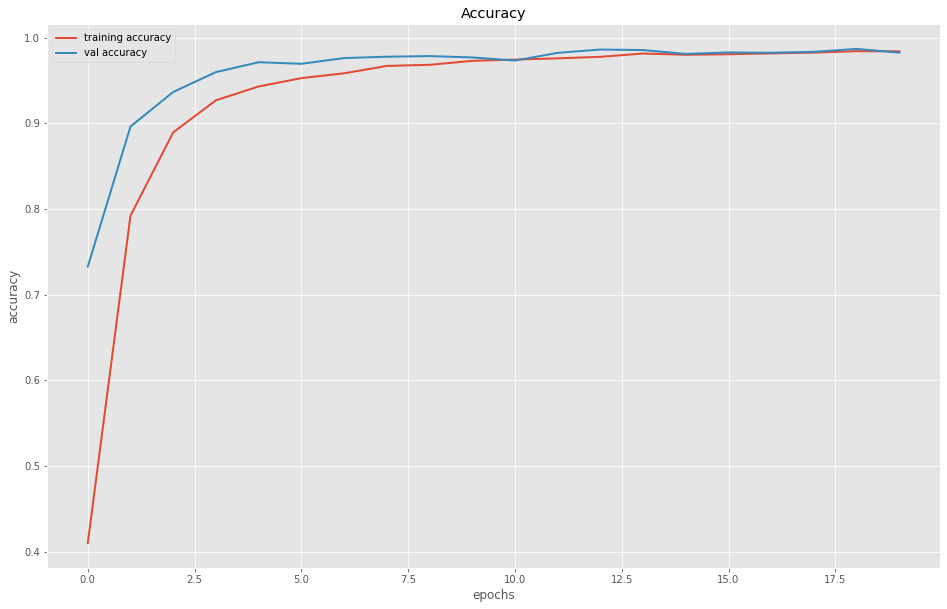

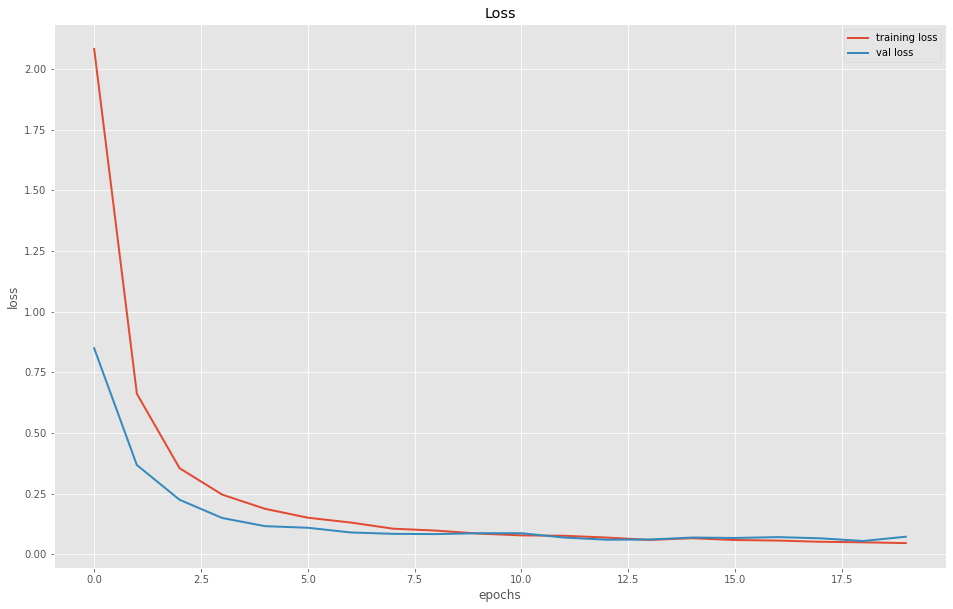

In [ ]:

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

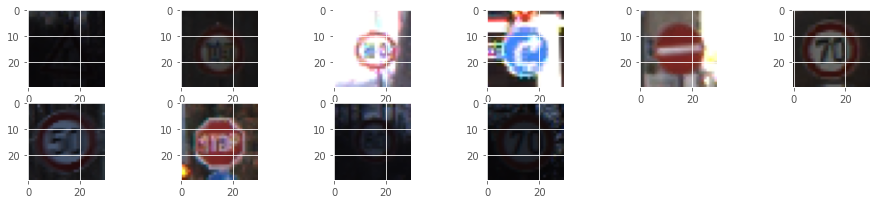

In [ ]:
for i in range(10):
  pyplot.subplot(6,6,i+1)
  pyplot.imshow(x_test[i])

### Testing our model with unseen test dataset

The predicted image is Turn right ahead


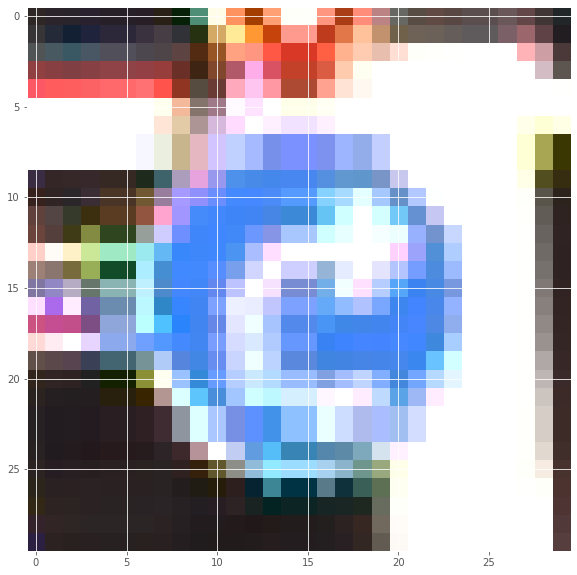

In [ ]:
image_index=3
plt.imshow(x_test[image_index])
n = np.array(x_test[image_index])
#print(n.size)
p = n.reshape(1, 30, 30, 3)
pred = classes[model.predict(p).argmax()]

print("The predicted image is {}".format(pred))

We can see that our model correctly predicted the traffic signal as "**Turn right ahead**". 

### Model Evaluation: Test  Accuracy

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print('test accuracy: ', accuracy * 100)

368/368 [==============================] - 3s 9ms/step - loss: 0.0583 - accuracy: 0.9850
test accuracy:  98.49528074264526


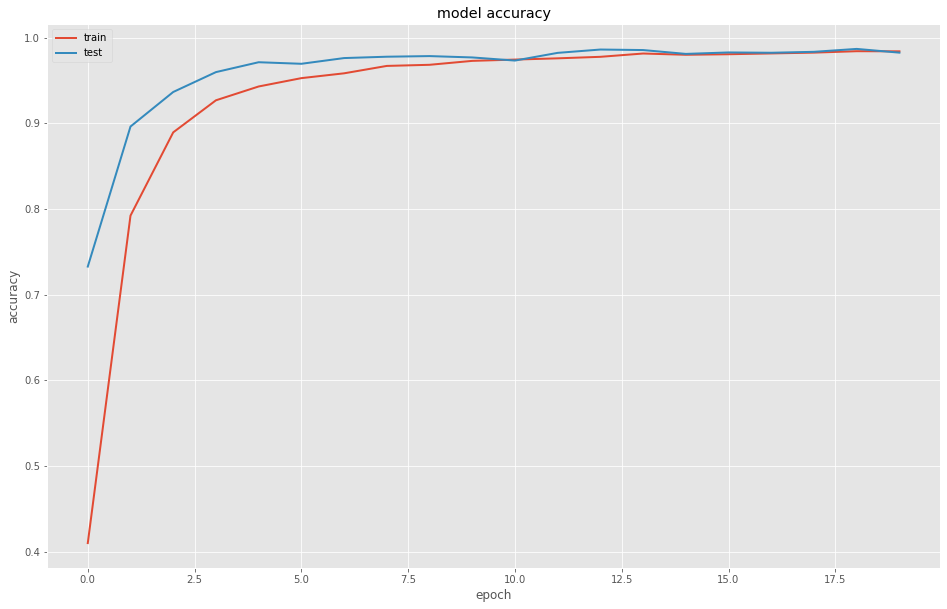

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Saving the model for later use
### HDF5 format
#### Keras provides a basic save format using the HDF5 standard.

In [ ]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('traffic_signal_classifier.h5') 

### Loading the saved model

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
loaded_cnn_model = tf.keras.models.load_model('traffic_signal_classifier.h5')

### Making prediction using the saved model

The predicted image is Stop


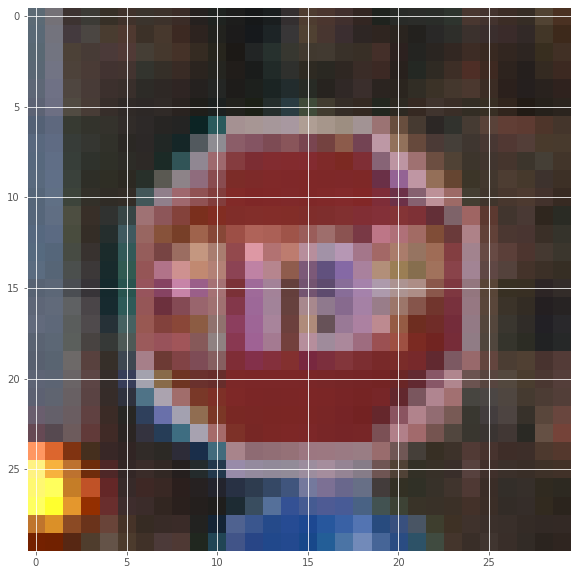

In [ ]:
image_index=7
plt.imshow(x_test[image_index])
n = np.array(x_test[image_index])
#print(n.size)
p = n.reshape(1, 30, 30, 3)
pred = classes[loaded_cnn_model.predict(p).argmax()]

print("The predicted image is {}".format(pred))

We can see that our model correctly predicted the traffic signal as "**Stop**". 